In [1]:
path = r'C:\Users\Purushotham\Desktop\deloitte\neuralnetworks\TF_2_Notebooks_and_Data\DATA\datasets\kc_house_data.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(path)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### EDA

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

C:\Users\Purushotham\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


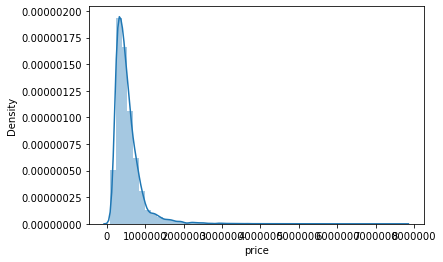

In [6]:
sns.distplot(df['price'])

C:\Users\Purushotham\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


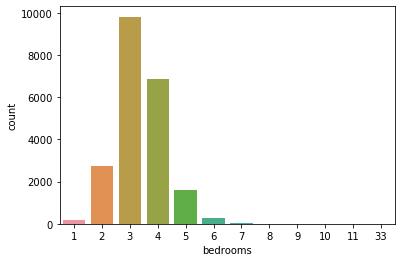

In [7]:
sns.countplot(df['bedrooms'])

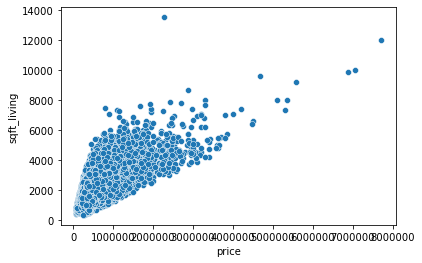

In [8]:
sns.scatterplot(x='price', y='sqft_living', data=df)

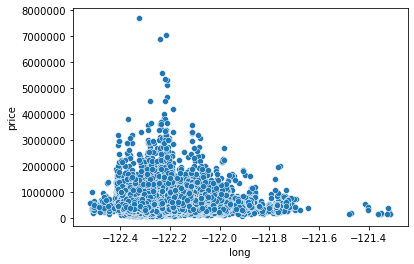

In [9]:
sns.scatterplot(x='long', y='price', data=df)

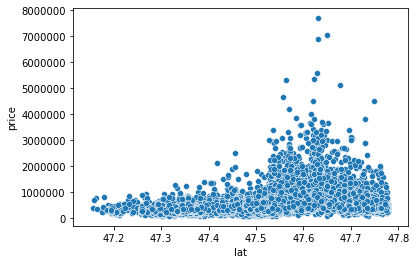

In [10]:
sns.scatterplot(x='lat', y='price', data=df)

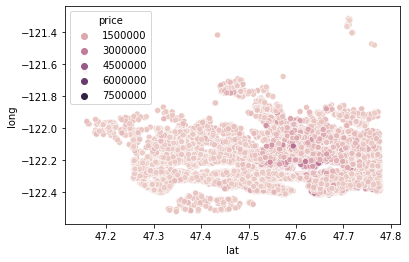

In [11]:
sns.scatterplot(x='lat', y='long', data=df, hue='price')

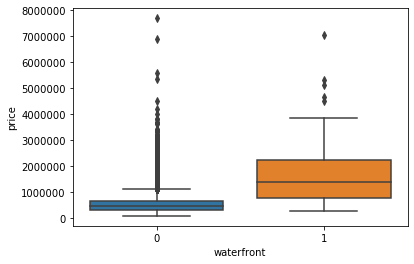

In [12]:
sns.boxplot(x='waterfront', y='price', data=df)

### Prepare the Data

In [13]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
df = df.drop('id', axis=1)

In [15]:
df['date'] = pd.to_datetime(df['date'])

In [16]:
df['month'] = df['date'].apply(lambda d : d.month)
df['year'] = df['date'].apply(lambda d : d.year)

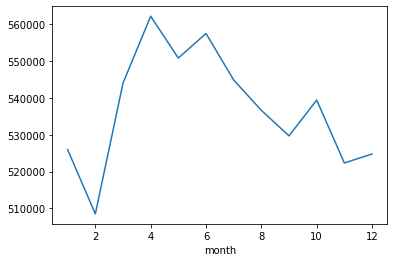

In [17]:
df.groupby('month').mean()['price'].plot()

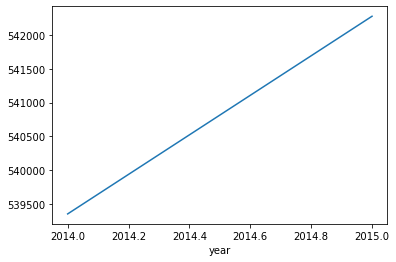

In [18]:
df.groupby('year').mean()['price'].plot()

In [19]:
df = df.drop('date',axis=1)

### Training

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [20]:
X = df.drop('price',axis=1)
y = df['price']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Creation

In [27]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [28]:
model.fit(
    x=X_train,
    y=y_train.values,
    validation_data=(X_test,y_test.values),
    batch_size=128,
    epochs=400
)

Epoch 1/400
119/119 [==============================] - 2s 5ms/step - loss: 430247411712.0000 - val_loss: 418954379264.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 429240352768.0000 - val_loss: 414933286912.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 409846513664.0000 - val_loss: 368020914176.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 307820593152.0000 - val_loss: 209484070912.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 145683791872.0000 - val_loss: 101772656640.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 102032621568.0000 - val_loss: 97458307072.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 99582820352.0000 - val_loss: 95627788288.0000
Epoch 8/400
119/119 [==============================] - 0s 3ms/step - loss: 97693417472.0000 - val_loss: 93801676800.0000
Epoch 9/400
119/119 [

119/119 [==============================] - 0s 4ms/step - loss: 34108753920.0000 - val_loss: 33330823168.0000
Epoch 69/400
119/119 [==============================] - 0s 3ms/step - loss: 33974626304.0000 - val_loss: 33235001344.0000
Epoch 70/400
119/119 [==============================] - 0s 3ms/step - loss: 33843927040.0000 - val_loss: 33112190976.0000
Epoch 71/400
119/119 [==============================] - 0s 3ms/step - loss: 33699788800.0000 - val_loss: 33051047936.0000
Epoch 72/400
119/119 [==============================] - 0s 3ms/step - loss: 33599533056.0000 - val_loss: 32954646528.0000
Epoch 73/400
119/119 [==============================] - 0s 3ms/step - loss: 33550168064.0000 - val_loss: 32796770304.0000
Epoch 74/400
119/119 [==============================] - 0s 3ms/step - loss: 33385361408.0000 - val_loss: 32687104000.0000
Epoch 75/400
119/119 [==============================] - 0s 3ms/step - loss: 33230456832.0000 - val_loss: 32597690368.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 3ms/step - loss: 29757450240.0000 - val_loss: 29397354496.0000
Epoch 136/400
119/119 [==============================] - 0s 3ms/step - loss: 29763592192.0000 - val_loss: 29385351168.0000
Epoch 137/400
119/119 [==============================] - 0s 3ms/step - loss: 29682018304.0000 - val_loss: 29392603136.0000
Epoch 138/400
119/119 [==============================] - 0s 3ms/step - loss: 29693798400.0000 - val_loss: 29408741376.0000
Epoch 139/400
119/119 [==============================] - 0s 3ms/step - loss: 29643419648.0000 - val_loss: 29344235520.0000
Epoch 140/400
119/119 [==============================] - 0s 3ms/step - loss: 29652051968.0000 - val_loss: 29485088768.0000
Epoch 141/400
119/119 [==============================] - 0s 3ms/step - loss: 29567574016.0000 - val_loss: 29450508288.0000
Epoch 142/400
119/119 [==============================] - 0s 3ms/step - loss: 29575784448.0000 - val_loss: 29266343936.0000
Epoch 143/400
11

119/119 [==============================] - 0s 3ms/step - loss: 28088584192.0000 - val_loss: 27988647936.0000
Epoch 202/400
119/119 [==============================] - 0s 4ms/step - loss: 28057659392.0000 - val_loss: 27944865792.0000
Epoch 203/400
119/119 [==============================] - 0s 3ms/step - loss: 28057606144.0000 - val_loss: 27994351616.0000
Epoch 204/400
119/119 [==============================] - 0s 3ms/step - loss: 28030777344.0000 - val_loss: 27922900992.0000
Epoch 205/400
119/119 [==============================] - 0s 3ms/step - loss: 28017387520.0000 - val_loss: 28074991616.0000
Epoch 206/400
119/119 [==============================] - 0s 3ms/step - loss: 28039118848.0000 - val_loss: 28105492480.0000
Epoch 207/400
119/119 [==============================] - 0s 3ms/step - loss: 27955472384.0000 - val_loss: 28389332992.0000
Epoch 208/400
119/119 [==============================] - 0s 3ms/step - loss: 27958048768.0000 - val_loss: 27914297344.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 27038603264.0000 - val_loss: 27112644608.0000
Epoch 268/400
119/119 [==============================] - 0s 3ms/step - loss: 27033810944.0000 - val_loss: 27049455616.0000
Epoch 269/400
119/119 [==============================] - 0s 3ms/step - loss: 27026759680.0000 - val_loss: 27137744896.0000
Epoch 270/400
119/119 [==============================] - 0s 4ms/step - loss: 26963552256.0000 - val_loss: 27175133184.0000
Epoch 271/400
119/119 [==============================] - 0s 4ms/step - loss: 26955210752.0000 - val_loss: 26993201152.0000
Epoch 272/400
119/119 [==============================] - 0s 4ms/step - loss: 26907852800.0000 - val_loss: 27202637824.0000
Epoch 273/400
119/119 [==============================] - 0s 3ms/step - loss: 26897686528.0000 - val_loss: 26858463232.0000
Epoch 274/400
119/119 [==============================] - 0s 3ms/step - loss: 26940708864.0000 - val_loss: 26891288576.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 4ms/step - loss: 26123003904.0000 - val_loss: 26261966848.0000
Epoch 334/400
119/119 [==============================] - 0s 4ms/step - loss: 26125363200.0000 - val_loss: 26207754240.0000
Epoch 335/400
119/119 [==============================] - 0s 3ms/step - loss: 26103181312.0000 - val_loss: 26086178816.0000
Epoch 336/400
119/119 [==============================] - 0s 3ms/step - loss: 26102376448.0000 - val_loss: 26160424960.0000
Epoch 337/400
119/119 [==============================] - 0s 3ms/step - loss: 26092574720.0000 - val_loss: 26260006912.0000
Epoch 338/400
119/119 [==============================] - 0s 3ms/step - loss: 26088779776.0000 - val_loss: 26338191360.0000
Epoch 339/400
119/119 [==============================] - 0s 3ms/step - loss: 26034851840.0000 - val_loss: 26111512576.0000
Epoch 340/400
119/119 [==============================] - 0s 3ms/step - loss: 26050134016.0000 - val_loss: 26162673664.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 25490688000.0000 - val_loss: 25584889856.0000
Epoch 400/400
119/119 [==============================] - 0s 3ms/step - loss: 25521418240.0000 - val_loss: 25378373632.0000


In [29]:
losses = pd.DataFrame(model.history.history)

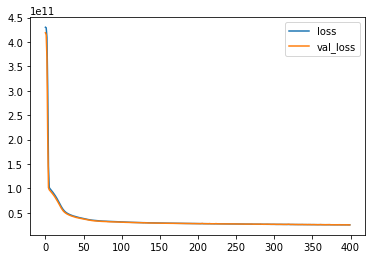

In [30]:
losses.plot()

### Evaluation

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [32]:
predictions = model.predict(X_test)

In [33]:
mean_absolute_error(y_test,predictions)

98265.24569408275

In [34]:
np.sqrt(mean_squared_error(y_test,predictions))


159305.89111381717

In [35]:
explained_variance_score(y_test,predictions)

0.8088376619267852

In [36]:
df['price'].mean()

540296.5735055795

450000.0

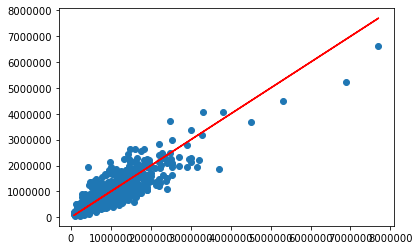

In [38]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

### Predicting for brand new house

In [47]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [41]:
single_house = df.drop('price', axis=1).iloc[0]
single_house.shape

(20,)

In [46]:
single_house = scaler.transform(single_house.values.reshape(-1, 20))

C:\Users\Purushotham\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [48]:
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.89393939, 0.57149751,
        0.21760797, 0.16193426, 0.00582059, 0.81818182, 0.        ]])

In [49]:
model.predict(single_house)

array([[266279.03]], dtype=float32)